## Intro to Tensorflow and Keras

In the beginning these were separate projects, TensorFlow provided a framework to parallelise computations on one or more GPUs. Despite not being directly made for ML, many of the building blocks were very well suited. As a result, Keras sprung up as a set of ML building blocks built upon TensorFlow. Over time the two became almost synonymous, to the point that now Keras is a core module within TensorFlow.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Standard imports
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Reshape the labels.
train_labels = train_labels[:,0]
test_labels = test_labels[:,0]

# And scale.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Keras provides neural network Lego blocks

We have different types/catergories of bricks and we stack them on top of one another to make something useful (or cool). Roughly speaking we can think of the following types when building Neural Networks, where every Network we build should have a:
 - An architecture
 - Loss function
 - Optimizer

Keras/Tensorflow offers a bunch of these built-in. But sometimes we'd need a lego brick very specific to our use case so we'd have to build it by ourselves from scratch, and Keras gives us the ability to do that.

## Model Building Blocks

`tensorflow.keras.layers` ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers)):
* `Dense` - A fully connected layer of neurons.
* `Conv2D` - A convolution layer
* `MaxPooling2D` - Subsampling/shrinking layer.
* `Dropout` - Regularisation technique.
* `BatchNormalisation` - Normalisation of layer output.

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## Loss Functions

`tensorflow.keras.losses` contains prebuilt loss functions ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses)):

* `MeanSquaredError`
* `MeanAbsoluteError`
* `SparseCategoricalCrossentropy`
* 15 or so more options.

It is also possible to build and use your own.

In [3]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

## Optimisers

`tensorflow.keras.optimizers` provides a number of optimisers ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)):

* `SGD` - Stochastic Gradient Descent
* `Adam`
* `Adagrad` - As well as other `Ada*` optimisers.

In [4]:
optimizer = tf.keras.optimizers.Adam()

## Metrics

`tensorflow.keras.metrics` provides a number of metrics that can be displayed when training - they do not actually have any impact on the training though ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)).

* `Accuracy`
* `Precision`
* `Recall`
* `CategoricalAccuracy`
* `SparseCategoricalAccuracy`

In [5]:
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

## Pre-processing

Using standard TensorFlow components to preprocess data.

Image augmentation is another technique to expand your training data by modifying images. For example, flipping, scaling and rotating an image of a cat shouldn't have any impact on the models ability to classify it as a dog.

If we only had 10,000 images we can artificially expand the dataset.

See [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for more information.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(horizontal_flip=True, 
                               zoom_range=0.15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range=15)

#Pretend we only have 10,000 images.
train_data_gen = image_gen.flow(train_images[:10000], train_labels[:10000])

# ...build a model
#
#
# Note how the data is passed to the model.fit(...) call.
# model.fit(train_data_gen,
#          epochs=10)



In [7]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

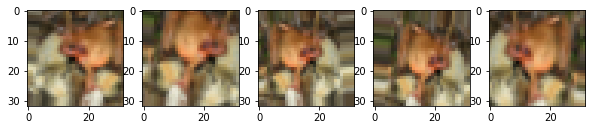

In [8]:
plt.figure(figsize=(10,10))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(augmented_images[i])
plt.show()

## Training Callbacks

As per the pattern, `tensorflow.keras.callbacks` provides a set of useful callbacks ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)):
* `EarlyStopping` - Stop training early if loss improvement is less than a certain amount.
* `LearningRateScheduler` - A callback to adjust the learning rate over time.
* `ModelCheckpoint` - Allows models to be saved periodically.

It is also possible to create your own callbacks to run at the start/end of training/test epochs/batches. (And other permutations.)

## Exercises

### Exercise 1

Try using a different optimiser, for example Stochastic Gradient Descent (SGD). Is the performance better or worse?

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()

#### MAKE MODIFICATIONS HERE ####

optimizer = tf.keras.optimizers.Adam()

#################################

accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

model.fit(train_images, train_labels,
          epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Exercise 2
The learning rate can be tuned to improve model performance. Try training and evaluating the same model with a learning rate of `0.0001` and `0.01`. Read [docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) to see how. (The default value is `0.001`.)

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()

#### MAKE MODIFICATIONS HERE ####

optimizer = tf.keras.optimizers.Adam()

#################################

accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

model.fit(train_images, train_labels,
          epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Exercise 3

Imagine we only have 5,000 images, try training on this set and see how the accuracy varies between the training and test set.

* Why do the epochs take less time to train?
* What happes if we let it run for more epochs?
* How does the training accuracy compare to the test accuracy?
* Try augmenting the dataset using an `ImageDataGenerator`

In [ ]:
small_train_images = train_images[0:5000]
small_train_labels = train_labels[0:5000]

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

model.fit(small_train_images, small_train_labels,
          epochs=50)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Exercise 4

Have a look at the code below, it introduces custom callbacks and early stopping. Try to understand what is happening and run it to see if the output matches your expectation.

In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_begin(self, epoch, logs=None):
    print('Starting epoch {}!!!'.format(epoch+1))

  def on_epoch_end(self, epoch, logs=None):
    print('\nFinished epoch {}!!!'.format(epoch+1))
    
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience=3, verbose=1)


model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

model.fit(train_images, train_labels,
          epochs=100,
          callbacks=[MyCustomCallback(), early_stop])

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Challenges

* Try using a `LearningRateScheduler` to decrease the learning rate over time.
* Try classifying the same image set to distinguish between binary categories, e.g. cat vs not-cat, animal vs machine.